## About the dataset

This data is from Kaggle and has information about people on the Titanic ship. The goal is to guess if passengers 
survived or not using certain details about them.

Dataset Link: https://www.kaggle.com/datasets/yasserh/titanic-dataset

## Problem Statement

To predict Survival and Non-Survival of Passengers

## Importing all necessary Libraries for Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Collection and Processing

In [3]:
#Reading the CSV file
titanic_data=pd.read_csv("titanic.csv")

#Printing the first 5 rows of the data
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Checking for the rows & columns and if there any null values
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 891 rows and 12 columns in which "Age","Cabin" and "Embarked" column contains null values and also different datatypes

In [5]:
#Checking for the number of Missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In the above output we can see that "Age", "Cabin" and "Embarked" contains missing values 

    1. Drop the "Cabin" column as it contains maximum missing values
    2. Fill the "Age" column with mean age with the help of (.fillna)
    3. Missing values of the "Embarked" column will be droped using (.dropna) 

In [6]:
#Droping the "Cabin" column as it contains maximum missing values
titanic_data.drop("Cabin",axis=1,inplace=True)

In [7]:
#Filling average age in "Age" column as null values are less 
titanic_data["Age"].fillna(titanic_data["Age"].mean(),inplace=True)

In [8]:
#Droping the null values from "Embarked" column
titanic_data.dropna(inplace=True)

In [9]:
#Droping unnecesarry columns
titanic_data.drop(["PassengerId","Name","Ticket","Fare"],axis=1,inplace=True)

In [10]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


## Analysing Data through different Graphs

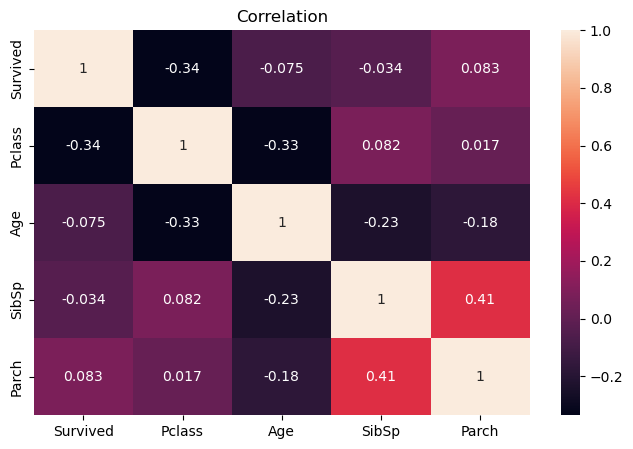

In [11]:
#Analysing the Correlation
plt.figure(figsize=(8,5))
sns.heatmap(titanic_data.corr(),annot=True)
plt.title("Correlation")
plt.show()

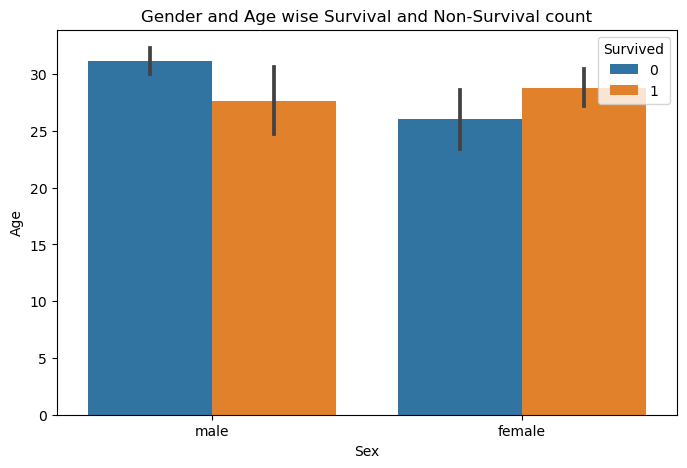

In [12]:
#Survival and Non-Survvival Count of male and female using BarPlot
plt.figure(figsize=(8,5))
sns.barplot(data=titanic_data,x='Sex',y='Age',hue='Survived')
plt.title("Gender and Age wise Survival and Non-Survival count")
plt.show()

In the above output we can see that the count of male survival is less than female survival

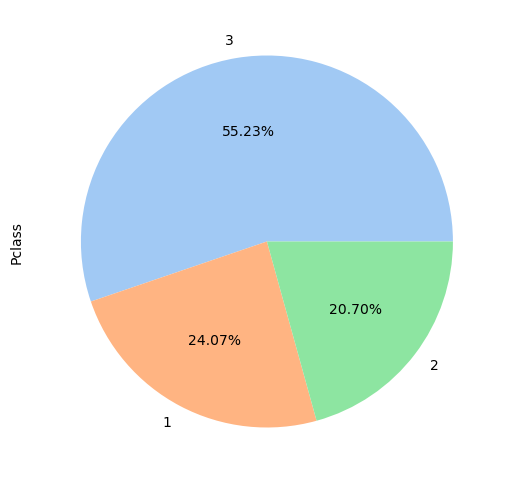

In [13]:
#Analysing class wise passengers
plt.figure(figsize=(6,7))
color=sns.color_palette('pastel')
titanic_data['Pclass'].value_counts().plot.pie(autopct='%1.2f%%',colors=color)
plt.show()

<Figure size 600x400 with 0 Axes>

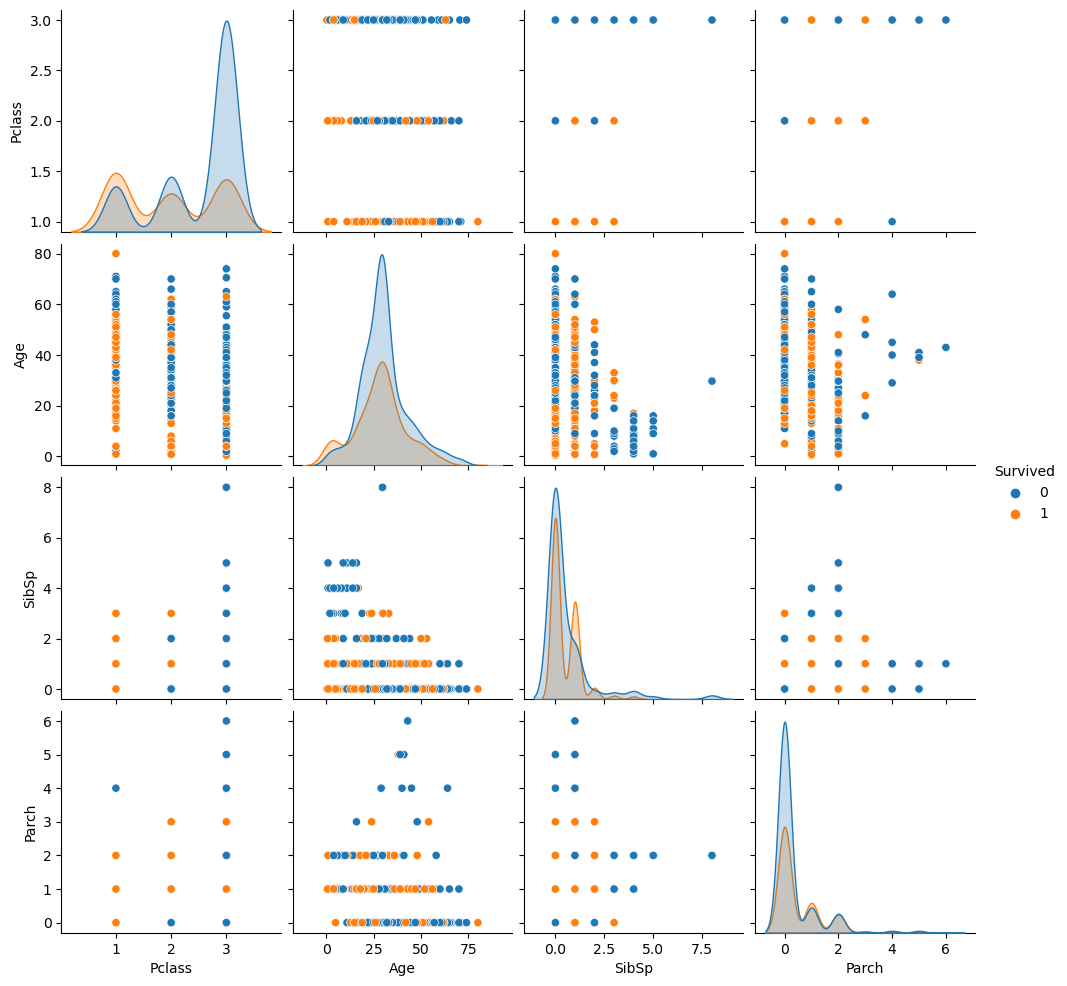

In [14]:
#Number of passengers Survived 
plt.figure(figsize=(6,4))
sns.pairplot(titanic_data,hue="Survived")
plt.show()

## Separating Data into X and Y

In [15]:
#Separating X and Y
x=titanic_data.iloc[:,1:]
y=titanic_data['Survived']

In [16]:
x

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.000000,1,0,S
1,1,female,38.000000,1,0,C
2,3,female,26.000000,0,0,S
3,1,female,35.000000,1,0,S
4,3,male,35.000000,0,0,S
...,...,...,...,...,...,...
886,2,male,27.000000,0,0,S
887,1,female,19.000000,0,0,S
888,3,female,29.699118,1,2,S
889,1,male,26.000000,0,0,C


## Encoding Categorical columns into Numerical columns

In [17]:
#Checking the total count of 'Sex' and 'Embarked' column
print(x["Sex"].value_counts())
print(x["Embarked"].value_counts())

male      577
female    312
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [18]:
#Replacing catogorical values with numerical values
x["Sex"]=x["Sex"].replace({'male':0,'female':1})
x["Embarked"]=x["Embarked"].replace({'S':0,'C':1,'Q':2})

In [19]:
x

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.000000,1,0,0
1,1,1,38.000000,1,0,1
2,3,1,26.000000,0,0,0
3,1,1,35.000000,1,0,0
4,3,0,35.000000,0,0,0
...,...,...,...,...,...,...
886,2,0,27.000000,0,0,0
887,1,1,19.000000,0,0,0
888,3,1,29.699118,1,2,0
889,1,0,26.000000,0,0,1


## Splitting the Data into Train and Test

In [20]:
#Importing train_test_split
from sklearn.model_selection import train_test_split

#Splitting the data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [21]:
print(x.shape,xtrain.shape,xtest.shape)

(889, 6) (666, 6) (223, 6)


In [22]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain = pd.DataFrame(ss.fit_transform(xtrain))
xtest = pd.DataFrame(ss.transform(xtest))

In [23]:
xtrain

,0,1,2,3,4,5
0,-0.413141,1.367732,0.019473,-0.462068,-0.472574,-0.566451
1,-0.413141,1.367732,-0.208195,0.467652,-0.472574,-0.566451
2,0.804346,-0.731138,-0.587642,-0.462068,-0.472574,-0.566451
3,-0.413141,-0.731138,-2.105428,0.467652,0.737943,-0.566451
4,0.804346,-0.731138,-0.003361,-0.462068,-0.472574,2.564306
...,...,...,...,...,...,...
661,-1.630629,1.367732,0.626588,-0.462068,-0.472574,0.998928
662,0.804346,-0.731138,-0.003361,0.467652,-0.472574,2.564306
663,0.804346,-0.731138,-0.284084,0.467652,-0.472574,0.998928
664,-0.413141,-0.731138,1.081923,0.467652,-0.472574,-0.566451


## Model Building

In [24]:
#Importing Logistic Regression and Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
#Assigning a variable to the model
logreg=LogisticRegression()

In [26]:
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [27]:
ac=round(accuracy_score(ytest,ypred)*100,2)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f'Accuracy Score: {ac}% \n ---------- \n Confusion Matrix {cm} \n ---------- \n Classification Report {cr}')

Accuracy Score: 84.3% 
 ---------- 
 Confusion Matrix [[118  20]
 [ 15  70]] 
 ---------- 
 Classification Report               precision    recall  f1-score   support

           0       0.89      0.86      0.87       138
           1       0.78      0.82      0.80        85

    accuracy                           0.84       223
   macro avg       0.83      0.84      0.84       223
weighted avg       0.85      0.84      0.84       223



As we can see the Accuracy_score is around 0.84, we will hypertune the model using Solver parameter

## Hypertunning using Solver Parameter

In [28]:
#Hypertuning with liblinear solver parameter
logreg=LogisticRegression(solver='liblinear')
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [29]:
ac=round(accuracy_score(ytest,ypred)*100,2)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f'Accuracy Score: {ac}% \n ---------- \n Confusion Matrix {cm} \n ---------- \n Classification Report {cr}')

Accuracy Score: 84.3% 
 ---------- 
 Confusion Matrix [[118  20]
 [ 15  70]] 
 ---------- 
 Classification Report               precision    recall  f1-score   support

           0       0.89      0.86      0.87       138
           1       0.78      0.82      0.80        85

    accuracy                           0.84       223
   macro avg       0.83      0.84      0.84       223
weighted avg       0.85      0.84      0.84       223



Accuracy score after hypertunning is same 

# Accuracy of this model is 84.3%